# Logistic Regression

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 4 of 7 (Balancing Target Classes)

**Current Notebook**: 5 of 7

**Next Notebook**: 6 of 7 (Decision Tree)

---

In this notebook I will optimize Logistic Regression models using a pipeline and cross-validation and compare the results of the original data set and the balanced data sets.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Basic-Logistic-Regression-Model" data-toc-modified-id="Basic-Logistic-Regression-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Logistic Regression Model</a></span></li><li><span><a href="#Model-Optimization-using-original-and-balanced-data-sets" data-toc-modified-id="Model-Optimization-using-original-and-balanced-data-sets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Optimization using original and balanced data sets</a></span><ul class="toc-item"><li><span><a href="#Original-data" data-toc-modified-id="Original-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Original data</a></span><ul class="toc-item"><li><span><a href="#Optimized-Logisitic-Regression-Model-with-Original-Data" data-toc-modified-id="Optimized-Logisitic-Regression-Model-with-Original-Data-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Optimized Logisitic Regression Model with Original Data</a></span></li></ul></li><li><span><a href="#Upsampled-Data" data-toc-modified-id="Upsampled-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Upsampled Data</a></span></li><li><span><a href="#Downsampled-Data" data-toc-modified-id="Downsampled-Data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Downsampled Data</a></span></li><li><span><a href="#SMOTEN-Upsampled-Data" data-toc-modified-id="SMOTEN-Upsampled-Data-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>SMOTEN Upsampled Data</a></span></li></ul></li><li><span><a href="#Model-Summary-Table" data-toc-modified-id="Model-Summary-Table-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model Summary Table</a></span></li><li><span><a href="#Feature-Evaluation" data-toc-modified-id="Feature-Evaluation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Evaluation</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

---

Import the required libraries.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for scaling the data
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# saving model outputs
import joblib

# model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

Read in the train and validation sets.

In [2]:
X_train = pd.read_pickle("data/X_train.pkl")
y_train = pd.read_pickle("data/y_train.pkl")

X_validation = pd.read_pickle("data/X_validation.pkl")
y_validation = pd.read_pickle("data/y_validation.pkl")

## Basic Logistic Regression Model

Fit a basic Logistic Regression model with the original X_train and y_train data sets.

In [3]:
#instantiate the model
LR_model = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=10)

In [4]:
# 3. Score on the training data 
print("Training score: ", LR_model.score(X_train, y_train))

# 4. Score on the validation data
print("Validation score: ", LR_model.score(X_validation, y_validation))

Training score:  0.7470154113305839
Validation score:  0.7470091241856146


The training score and validation score are very similar, the model is not overfitting to the training data. But in order to evaluate the predictions the model is making I am going to plot the confusion matrix. 

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


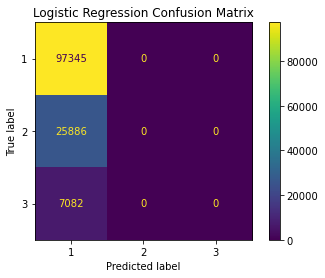

In [5]:
plot_confusion_matrix(LR_model, X_validation, y_validation)
plt.title("Logistic Regression Confusion Matrix");

The basic Logistic Regression model is only predicting class 1 (On-time flights).

Get the predicted y values by using `predict` on the X_validation data set.

In [6]:
y_predictions = LR_model.predict(X_validation)

Use the predictions and the y_validation set to get the precision, recall and f1-scores for the model.

In [7]:
report_LR_basic = classification_report(y_validation, y_predictions)
print(report_LR_basic)

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.00      0.00      0.00     25886
           3       0.00      0.00      0.00      7082

    accuracy                           0.75    130313
   macro avg       0.25      0.33      0.29    130313
weighted avg       0.56      0.75      0.64    130313



/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision and recall scores are very high for class 1 and 0 for all other classes, as is expected from the confusion matrix.

---

## Model Optimization using original and balanced data sets

I'm going to create a pipeline to optimize the Logistic Regression models using the original and balanced data sets. I will then make predictions and compare the model outputs using the confusion matrices and precision, recall and f1-scores.

- First - original data
- Second - Upsampled data
- Third - Downsampled data
- Fourth - SMOTEN Upsampled data

### Original data

In [8]:
# create a list of tuples to store the functions that will be completed in the pipeline
# normalize the data using a StandardScaler
# instantiate the Logistic Regression model
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

# intialize the pipeline, input estimators as the steps for the pipeline to take
pipe = Pipeline(estimators)

# set the parameters that you want GridSearchCV to iterate through
# I want the pipeline to test whether a StandardScaler or none is optimal
# then it will fit the LR model, and loop through the range of C values I have input
parameters = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

# use GridSearchCV, input the pipeline, the parameters to test and the number of times it should cross-validate
# cross-validation creates a different number of splits of the data
# we don't need to split the data again because cross-validation will split the data 5 times into different variations
# of train and validation
orig_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the original X_train and y_train data
orig_fitgrid = orig_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.8s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   1.5s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   1.7s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   1.6s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   1.5s

Save the grid output using `dump` from the joblib library.

In [10]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(orig_fitgrid, 'LR_orig_grid.pkl')

['LR_orig_grid.pkl']

The grid has fit on X_train and y_train. From the gridsearch outputs we can see that the run-time using StandardScaler is approximately twice as fast as without. 

The results of the gridsearch can be saved in a dataframe using `cv_results` to get the grid outputs.

In [81]:
orig_df = pd.DataFrame(orig_fitgrid.cv_results_)
orig_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_normalise,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.718173,0.010266,0.050797,0.000384,LogisticRegression(C=1),0.001,StandardScaler(),"{'model': LogisticRegression(C=1), 'model__C':...",0.747159,0.747439,0.746629,0.747155,0.747106,0.747098,0.000262,5
1,1.694883,0.309853,0.050056,0.000690,LogisticRegression(C=1),0.001,None,"{'model': LogisticRegression(C=1), 'model__C':...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,7
2,0.701485,0.019126,0.050754,0.000886,LogisticRegression(C=1),0.01,StandardScaler(),"{'model': LogisticRegression(C=1), 'model__C':...",0.747159,0.747390,0.746613,0.747188,0.747106,0.747091,0.000258,6
3,1.592301,0.197613,0.050273,0.001025,LogisticRegression(C=1),0.01,None,"{'model': LogisticRegression(C=1), 'model__C':...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,7
4,0.686466,0.012468,0.050672,0.000489,LogisticRegression(C=1),0.1,StandardScaler(),"{'model': LogisticRegression(C=1), 'model__C':...",0.747209,0.747390,0.746596,0.747188,0.747139,0.747104,0.000268,4
5,1.579383,0.196144,0.050219,0.000855,LogisticRegression(C=1),0.1,None,"{'model': LogisticRegression(C=1), 'model__C':...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,7
6,0.682626,0.010989,0.050809,0.001455,LogisticRegression(C=1),1,StandardScaler(),"{'model': LogisticRegression(C=1), 'model__C':...",0.747209,0.747390,0.746596,0.747204,0.747139,0.747107,0.000269,1
7,1.575230,0.193218,0.049557,0.000799,LogisticRegression(C=1),1,None,"{'model': LogisticRegression(C=1), 'model__C':...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,7
8,0.689858,0.010196,0.050033,0.000778,LogisticRegression(C=1),10,StandardScaler(),"{'model': LogisticRegression(C=1), 'model__C':...",0.747209,0.747390,0.746596,0.747204,0.747139,0.747107,0.000269,1
9,1.582435,0.196969,0.049474,0.000836,LogisticRegression(C=1),10,None,"{'model': LogisticRegression(C=1), 'model__C':...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,7


Use `best_estimator_` to get the optimal hyperparameters for this data.

In [9]:
orig_fitgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', LogisticRegression(C=1))])

The best model was normalized using StandardScaler and had a C value of 1. To get the results from this model I need to re-fit a LR model with the parameters selected by gridsearch. First I will scale X_train and transform the X_train and X_validation data sets.

In [11]:
# instantiate the scaler
scaler = StandardScaler()

#fit the scaler on X_train
scaler.fit(X_train)

# transform X_train and X_validation
X_train_s = scaler.transform(X_train)
X_validation_s = scaler.transform(X_validation)

#### Optimized Logisitic Regression Model with Original Data

In [12]:
#Model with original scaled data

#instantiate the model
LR_model_orig = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000, C = 1)

# fit the model
LR_model_orig.fit(X_train_s, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=10)

Get the accuracy scores of the model.

In [13]:
# 3. Score on the training data 
print("Training score: ", LR_model_orig.score(X_train_s, y_train))

# 4. Score on the validation data
print("Validation score: ", LR_model_orig.score(X_validation_s, y_validation))

Training score:  0.7471535410541271
Validation score:  0.7474311849163169


/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


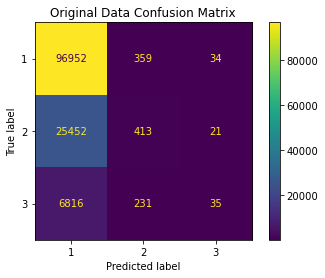

In [15]:
plot_confusion_matrix(LR_model_orig, X_validation_s, y_validation)
plt.title("Original Data Confusion Matrix");

The model improves at predicting classes 2 and 3 using scaled data.

Make predictions using the scaled X_validation_s set.

In [17]:
y_predictions_orig = LR_model_orig.predict(X_validation_s)

Use the predictions and the y_validation data set to create a classification report.

In [18]:
report_orig = classification_report(y_validation, y_predictions_orig)
print(report_orig)

              precision    recall  f1-score   support

           1       0.75      1.00      0.86     97345
           2       0.41      0.02      0.03     25886
           3       0.39      0.00      0.01      7082

    accuracy                           0.75    130313
   macro avg       0.52      0.34      0.30    130313
weighted avg       0.66      0.75      0.65    130313



The optimized Logistic Regression model using the original data has improved the precision but not the recall for classes 2 and 3. It's still doing a very poor job of predicting these classes.

---

###  Upsampled Data

Read in the upsampled X_train and y_train data.

In [19]:
X_train_up = pd.read_pickle("data/X_train_over.pkl")
y_train_up = pd.read_pickle("data/y_train_over.pkl")

In [20]:
# store estimators
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

# instantiate pipeline
pipe = Pipeline(estimators)

# create parameters for gridsearch
parameters = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

#instantiate gridsearch
up_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the upsampled X_train and y_train data
up_fitgrid = up_grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.5s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.5s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.5s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.5s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   1.3s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.1s

Save the grid output using `dump` from the joblib library.

In [21]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(up_fitgrid, 'LR_up_grid.pkl')

['LR_up_grid.pkl']

The grid has fit on X_train_up and y_train_up. 

The results of the gridsearch can be saved in a dataframe using `cv_results` to get the grid outputs.

In [87]:
up_df = pd.DataFrame(up_fitgrid.cv_results_)
up_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_normalise,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.334996,0.007122,0.120594,0.003099,LogisticRegression(C=0.001),0.001,StandardScaler(),"{'model': LogisticRegression(C=0.001), 'model_...",0.445085,0.442759,0.445030,0.444296,0.444032,0.444240,0.000846,1
1,1.802045,0.296172,0.117471,0.002080,LogisticRegression(C=0.001),0.001,None,"{'model': LogisticRegression(C=0.001), 'model_...",0.358780,0.333333,0.357895,0.356134,0.358313,0.352891,0.009820,7
2,1.319129,0.009299,0.119539,0.002969,LogisticRegression(C=0.001),0.01,StandardScaler(),"{'model': LogisticRegression(C=0.001), 'model_...",0.445115,0.442767,0.444868,0.444347,0.444054,0.444230,0.000822,2
3,1.786160,0.302038,0.118305,0.001937,LogisticRegression(C=0.001),0.01,None,"{'model': LogisticRegression(C=0.001), 'model_...",0.358780,0.333333,0.357895,0.356134,0.358313,0.352891,0.009820,7
4,1.315474,0.010191,0.119673,0.002595,LogisticRegression(C=0.001),0.1,StandardScaler(),"{'model': LogisticRegression(C=0.001), 'model_...",0.445063,0.442796,0.444868,0.444303,0.444047,0.444216,0.000800,3
5,1.795467,0.300506,0.115797,0.002340,LogisticRegression(C=0.001),0.1,None,"{'model': LogisticRegression(C=0.001), 'model_...",0.358780,0.333333,0.357895,0.356134,0.358313,0.352891,0.009820,7
6,1.312451,0.013095,0.121507,0.001196,LogisticRegression(C=0.001),1,StandardScaler(),"{'model': LogisticRegression(C=0.001), 'model_...",0.445063,0.442796,0.444868,0.444281,0.444047,0.444211,0.000799,4
7,1.807059,0.299631,0.117037,0.001528,LogisticRegression(C=0.001),1,None,"{'model': LogisticRegression(C=0.001), 'model_...",0.358780,0.333333,0.357895,0.356134,0.358313,0.352891,0.009820,7
8,1.325170,0.011672,0.120059,0.002718,LogisticRegression(C=0.001),10,StandardScaler(),"{'model': LogisticRegression(C=0.001), 'model_...",0.445063,0.442796,0.444868,0.444281,0.444047,0.444211,0.000799,4
9,1.815670,0.314033,0.117340,0.001591,LogisticRegression(C=0.001),10,None,"{'model': LogisticRegression(C=0.001), 'model_...",0.358780,0.333333,0.357895,0.356134,0.358313,0.352891,0.009820,7


Use `best_estimator_` to get the optimal hyperparameters for this data.

In [22]:
up_fitgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', LogisticRegression(C=0.001))])

The best model is normalized using Standard Scaler and has a C value of 0.001. Re-run the Logistic Regression model using Standard Scaler and C=0.001 to produce the confusion matrix and the precision, recall and f1-scores.

In [23]:
# Model with upsampled scaled data

# Scale the upsampled data
scaler = StandardScaler()

# fit on X_train_up
scaler.fit(X_train_up)

# transform X_train_up and X_validation
X_train_up_s = scaler.transform(X_train_up)
X_validation_s = scaler.transform(X_validation)

#instantiate the model
LR_model_up = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000, C = 0.001)

# fit the model
LR_model_up.fit(X_train_up_s, y_train_up)

LogisticRegression(C=0.001, max_iter=10000, random_state=10)

Check the accuracy scores for the training and validation sets.

In [24]:
# 3. Score on the training data 
print("Training score: ", LR_model_up.score(X_train_up_s, y_train_up))

# 4. Score on the testing data
print("Validation score: ", LR_model_up.score(X_validation_s, y_validation))

Training score:  0.44429475636798027
Validation score:  0.5087366571255362


The model accuracy has gone down significantly. The validation set is scoring higher than the training set. But I want to check the confusion matrix and the precision, recall and f1-scores to see how it's predicting each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


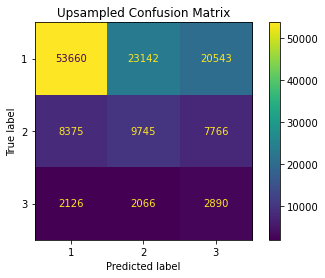

In [25]:
plot_confusion_matrix(LR_model_up, X_validation_s, y_validation)
plt.title("Upsampled Confusion Matrix");

The model improves at predicting classes 2 and 3 using scaled upsampled data, but performs worse with class 1.

Make predictions using the scaled X_validation_s data.

In [26]:
y_predictions_up = LR_model_up.predict(X_validation_s)

Create the classification report.

In [28]:
report_up = classification_report(y_validation, y_predictions_up)
print(report_up)

              precision    recall  f1-score   support

           1       0.84      0.55      0.66     97345
           2       0.28      0.38      0.32     25886
           3       0.09      0.41      0.15      7082

    accuracy                           0.51    130313
   macro avg       0.40      0.45      0.38    130313
weighted avg       0.69      0.51      0.57    130313



Precision and recall scores have improved for classes 2 and 3, recall has decreased for class 1. This is a big improvement for classes 2 and 3 as compared to the original data sets, the f1-score shows that more of a balance is being struck between precision and recall for all the classes.

---

### Downsampled Data

Read in the downsampled X_train and y_train data.

In [29]:
X_train_down = pd.read_pickle("data/X_train_under.pkl")
y_train_down = pd.read_pickle("data/y_train_under.pkl")

In [30]:
# store estimators
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

# instantiate pipeline
pipe = Pipeline(estimators)

# create parameters for gridsearch
parameters = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

#instantiate gridsearch
down_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the upsampled X_train and y_train data
down_fitgrid = down_grid.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   0.2s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   0.2s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   0.2s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   0.2s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   0.2s

Save the grid output using `dump` from the joblib library.

In [31]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(down_fitgrid, 'LR_down_grid.pkl')

['LR_down_grid.pkl']

The grid has fit on X_train_down and y_train_down. 

The results of the gridsearch can be saved in a dataframe using `cv_results` to get the grid outputs.

In [88]:
down_df = pd.DataFrame(down_fitgrid.cv_results_)
down_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_normalise,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097019,0.002484,0.008242,0.000247,LogisticRegression(C=0.1),0.001,StandardScaler(),"{'model': LogisticRegression(C=0.1), 'model__C...",0.444377,0.441856,0.451483,0.456224,0.451684,0.449125,0.005251,6
1,0.156026,0.005592,0.008249,0.000407,LogisticRegression(C=0.1),0.001,None,"{'model': LogisticRegression(C=0.1), 'model__C...",0.361674,0.357136,0.361005,0.359895,0.359693,0.359881,0.001552,7
2,0.095420,0.001412,0.008525,0.000202,LogisticRegression(C=0.1),0.01,StandardScaler(),"{'model': LogisticRegression(C=0.1), 'model__C...",0.445184,0.442965,0.451584,0.456829,0.451987,0.449710,0.005007,4
3,0.154883,0.006378,0.007941,0.000246,LogisticRegression(C=0.1),0.01,None,"{'model': LogisticRegression(C=0.1), 'model__C...",0.361674,0.357136,0.361005,0.359895,0.359693,0.359881,0.001552,7
4,0.095465,0.002866,0.008281,0.000238,LogisticRegression(C=0.1),0.1,StandardScaler(),"{'model': LogisticRegression(C=0.1), 'model__C...",0.445184,0.442965,0.451886,0.456627,0.452189,0.449770,0.004994,1
5,0.154386,0.005097,0.008058,0.000125,LogisticRegression(C=0.1),0.1,None,"{'model': LogisticRegression(C=0.1), 'model__C...",0.361674,0.357136,0.361005,0.359895,0.359693,0.359881,0.001552,7
6,0.094633,0.001429,0.008244,0.000131,LogisticRegression(C=0.1),1,StandardScaler(),"{'model': LogisticRegression(C=0.1), 'model__C...",0.445184,0.442864,0.451886,0.456425,0.452290,0.449730,0.004977,2
7,0.163602,0.007189,0.008798,0.001157,LogisticRegression(C=0.1),1,None,"{'model': LogisticRegression(C=0.1), 'model__C...",0.361674,0.357136,0.361005,0.359895,0.359693,0.359881,0.001552,7
8,0.095830,0.000210,0.008364,0.000237,LogisticRegression(C=0.1),10,StandardScaler(),"{'model': LogisticRegression(C=0.1), 'model__C...",0.445083,0.442864,0.451886,0.456425,0.452290,0.449710,0.004995,3
9,0.154610,0.006882,0.007974,0.000198,LogisticRegression(C=0.1),10,None,"{'model': LogisticRegression(C=0.1), 'model__C...",0.361674,0.357136,0.361005,0.359895,0.359693,0.359881,0.001552,7


In [32]:
down_fitgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', LogisticRegression(C=0.1))])

The best model is normalized using Standard Scaler and has a C value of 0.1. Re-run the Logistic Regression model using Standard Scaler and C=0.1 to produce the confusion matrix and the precision, recall and f1-scores.

In [34]:
#Model with downsampled scaled data

# Scale the downsampled data
# instantiate the scaler
scaler = StandardScaler()

# fit the scaler on X_train_down data
scaler .fit(X_train_down)

# transform X_train_down and X_validation
X_train_down_s = scaler.transform(X_train_down)
X_validation_s = scaler.transform(X_validation)

#instantiate the model
LR_model_down = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000, C = 0.1)

# fit the model on the downsampled X_train_down and y_train_down data sets
LR_model_down.fit(X_train_down_s, y_train_down)

LogisticRegression(C=0.1, max_iter=10000, random_state=10)

In [35]:
# Score on the training data 
print("Training score: ", LR_model_down.score(X_train_down_s, y_train_down))

# Score on the validation data
print("Validation score: ", LR_model_down.score(X_validation_s, y_validation))

Training score:  0.4506979746631163
Validation score:  0.5099874916547082


The accuracy scores for the downsampled data are low, and the validation sets have scored higher than the training sets. But I need to compare the results of the confusion matrix and classification report.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


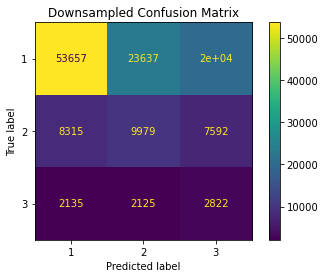

In [36]:
plot_confusion_matrix(LR_model_down, X_validation_s, y_validation)
plt.title("Downsampled Confusion Matrix");

The model improves at predicting classes 2 and 3 using scaled downsampled data, but as with the upsampled data it also performs worse for class 1.

In [37]:
y_predictions_down = LR_model_down.predict(X_validation_s)

In [38]:
report_down = classification_report(y_validation, y_predictions_down)
print(report_down)

              precision    recall  f1-score   support

           1       0.84      0.55      0.66     97345
           2       0.28      0.39      0.32     25886
           3       0.09      0.40      0.15      7082

    accuracy                           0.51    130313
   macro avg       0.40      0.45      0.38    130313
weighted avg       0.69      0.51      0.57    130313



Precision and recall scores have improved for classes 2 and 3, recall has decreased for class 1. The f1-scores are the same as for the upsampled data.

---

### SMOTEN Upsampled Data

Read in the SMOTEN upsampled X_train and y_train data.

In [39]:
X_train_smote = pd.read_pickle("data/X_train_smote.pkl")
y_train_smote = pd.read_pickle("data/y_train_smote.pkl")

In [40]:
# store estimators
estimators = [('normalise', StandardScaler()),
              ('model', LogisticRegression())]

# instantiate pipeline
pipe = Pipeline(estimators)

# create parameters for gridsearch
parameters = [
            {'model': [LogisticRegression()], 
             'normalise': [StandardScaler(), None],
             'model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

#instantiate gridsearch
smote_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the upsampled X_train and y_train data
smote_fitgrid = smote_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=StandardScaler(); total time=   1.4s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.1s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s
[CV] END model=LogisticRegression(), model__C=0.001, normalise=None; total time=   2.0s

Save the grid output using `dump` from the joblib library.

In [41]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(smote_fitgrid, 'LR_smote_grid.pkl')

['LR_smote_grid.pkl']

The grid has fit on X_train_smote and y_train_smote. 

The results of the gridsearch can be saved in a dataframe using `cv_results` to get the grid outputs.

In [89]:
smote_df = pd.DataFrame(smote_fitgrid.cv_results_)
smote_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__C,param_normalise,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.276503,0.005240,0.120918,0.002090,LogisticRegression(C=0.01),0.001,StandardScaler(),"{'model': LogisticRegression(C=0.01), 'model__...",0.438393,0.453296,0.440935,0.456704,0.459999,0.449866,0.008632,6
1,1.896673,0.037494,0.118360,0.000816,LogisticRegression(C=0.01),0.001,None,"{'model': LogisticRegression(C=0.01), 'model__...",0.359404,0.359022,0.360346,0.361043,0.362848,0.360533,0.001357,7
2,1.283096,0.006620,0.120380,0.002075,LogisticRegression(C=0.01),0.01,StandardScaler(),"{'model': LogisticRegression(C=0.01), 'model__...",0.438591,0.453252,0.441097,0.456763,0.459903,0.449921,0.008530,1
3,1.893115,0.036350,0.118313,0.000950,LogisticRegression(C=0.01),0.01,None,"{'model': LogisticRegression(C=0.01), 'model__...",0.359404,0.359022,0.360346,0.361043,0.362848,0.360533,0.001357,7
4,1.283079,0.007345,0.120539,0.001553,LogisticRegression(C=0.01),0.1,StandardScaler(),"{'model': LogisticRegression(C=0.01), 'model__...",0.438555,0.453252,0.441023,0.456777,0.459903,0.449902,0.008557,2
5,1.900658,0.032203,0.119618,0.000848,LogisticRegression(C=0.01),0.1,None,"{'model': LogisticRegression(C=0.01), 'model__...",0.359404,0.359022,0.360346,0.361043,0.362848,0.360533,0.001357,7
6,1.287644,0.005317,0.122274,0.001109,LogisticRegression(C=0.01),1,StandardScaler(),"{'model': LogisticRegression(C=0.01), 'model__...",0.438555,0.453252,0.441023,0.456770,0.459903,0.449901,0.008556,3
7,1.930786,0.033374,0.118260,0.000999,LogisticRegression(C=0.01),1,None,"{'model': LogisticRegression(C=0.01), 'model__...",0.359404,0.359022,0.360346,0.361043,0.362848,0.360533,0.001357,7
8,1.289866,0.006247,0.121061,0.001374,LogisticRegression(C=0.01),10,StandardScaler(),"{'model': LogisticRegression(C=0.01), 'model__...",0.438555,0.453252,0.441023,0.456770,0.459903,0.449901,0.008556,3
9,1.906269,0.041631,0.117312,0.001876,LogisticRegression(C=0.01),10,None,"{'model': LogisticRegression(C=0.01), 'model__...",0.359404,0.359022,0.360346,0.361043,0.362848,0.360533,0.001357,7


In [42]:
smote_fitgrid.best_estimator_

Pipeline(steps=[('normalise', StandardScaler()),
                ('model', LogisticRegression(C=0.01))])

The best model is normalized using Standard Scaler and has a C value of 0.01. Re-run the Logistic Regression model using Standard Scaler and C=0.01 to produce the confusion matrix and the precision, recall and f1-scores.

In [43]:
#Model with SMOTEN upsampled scaled data

# Scale the SMOTEN upsampled data
#instantiate the scaler
scaler = StandardScaler()

# fit the scaler on the smote data
scaler.fit(X_train_smote)

# transform X_train_smote and X_validation
X_train_smote_s = scaler.transform(X_train_smote)
X_validation_s = scaler.transform(X_validation)


#instantiate the model
LR_model_smote = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000, C = 0.01)

# fit the model on the scaled X_train_smote_s and y_train_smote_s
LR_model_smote.fit(X_train_smote_s, y_train_smote)

LogisticRegression(C=0.01, max_iter=10000, random_state=10)

Get the scores of the optimized model.

In [44]:
# 3. Score on the training data 
print("Training score: ", LR_model_smote.score(X_train_smote_s, y_train_smote))

# 4. Score on the validation data
print("Validation score: ", LR_model_smote.score(X_validation_s, y_validation))

Training score:  0.45215044532202747
Validation score:  0.5089208290807518


The validation score is higher than the training score, but I want to look at the confusion matrix and classification report to know how well the model is predicting each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


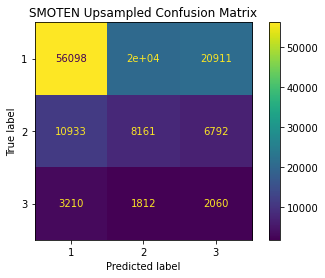

In [45]:
plot_confusion_matrix(LR_model_smote, X_validation_s, y_validation)
plt.title("SMOTEN Upsampled Confusion Matrix");

The model improves at predicting classes 2 and 3 using scaled SMOTEN data, as compared to the base model. But it performs worse than the downsampled data at predicting classes 2 and 3.

Calculate the model predictions using the scaled X_validation data.

In [46]:
y_predictions_smote = LR_model_smote.predict(X_validation_s)

Create a classification report.

In [47]:
report_smote = classification_report(y_validation, y_predictions_smote)
print(report_smote)

              precision    recall  f1-score   support

           1       0.80      0.58      0.67     97345
           2       0.27      0.32      0.29     25886
           3       0.07      0.29      0.11      7082

    accuracy                           0.51    130313
   macro avg       0.38      0.39      0.36    130313
weighted avg       0.65      0.51      0.56    130313



Precision and recall scores have decreased for classes 2 and 3 using SMOTEN upsampled data, as compared to the downsampled data.  

---

## Model Summary Table

The results of the classification reports of each model are summarized in the table below.

| Data        | Class   | Precision | Recall | F1   |
|-------------|---------|-----------|--------|------|
| Original    |         |           |        |      |
|             | Class 1 | 0.75      | 1.00   | 0.86 |
|             | Class 2 | 0.41      | 0.02   | 0.03 |
|             | Class 3 | 0.39      | 0.00   | 0.01 |
| Upsampled   |         |           |        |      |
|             | Class 1 | 0.84      | 0.55   | 0.66 |
|             | Class 2 | 0.28      | 0.38   | 0.32 |
|             | Class 3 | 0.09      | 0.41   | 0.15 |
| Downsampled |         |           |        |      |
|             | Class 1 | 0.84      | 0.55   | 0.66 |
|             | Class 2 | 0.28      | 0.39   | 0.32 |
|             | Class 3 | 0.09      | 0.40   | 0.15 |
| SMOTEN      |         |           |        |      |
|             | Class 1 | 0.80      | 0.58   | 0.67 |
|             | Class 2 | 0.27      | 0.32   | 0.29 |
|             | Class 3 | 0.07      | 0.29   | 0.11 |

---

## Feature Evaluation

The best results from the optimized models were from the upsampled and downsampled data sets. Since I got the same f1-scores for each model, I will evaluate the features using the downsampled data.

Get the coefficients for each feature from the downsampled model using `coef`.

In [114]:
LR_down_coefs = LR_model_down.coef_

Create a dataframe with the feature names and the coefficient values. I need to index the coefficients variable to get the results for each class.

In [174]:
# Put the feature names and their coefficient values into a data frame
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Class_1_coefs': LR_model_down.coef_[0], 'Class_2_coefs': LR_model_down.coef_[1], 'Class_3_coefs': LR_model_down.coef_[2]})

# set the index as the variable name for plotting
coef_df = coef_df.set_index("Feature")
coef_df

,Class_1_coefs,Class_2_coefs,Class_3_coefs
Feature,,,
Year,-0.208314,0.083101,0.125214
DayofMonth,0.004795,0.011585,-0.016380
Quarter,-0.024793,0.005916,0.018877
DayofWeek,-0.053651,0.019517,0.034134
DOT_ID_Reporting_Airline,0.135078,-0.145129,0.010051
DestAirportID,0.028702,-0.023833,-0.004869
DestStateFips,0.006200,-0.004395,-0.001805
CRSDepTime,-0.179111,0.005701,0.173410
DistanceGroup,-0.128400,0.103160,0.025239


Plot out the values of each coefficient to see the feature importance for each class.

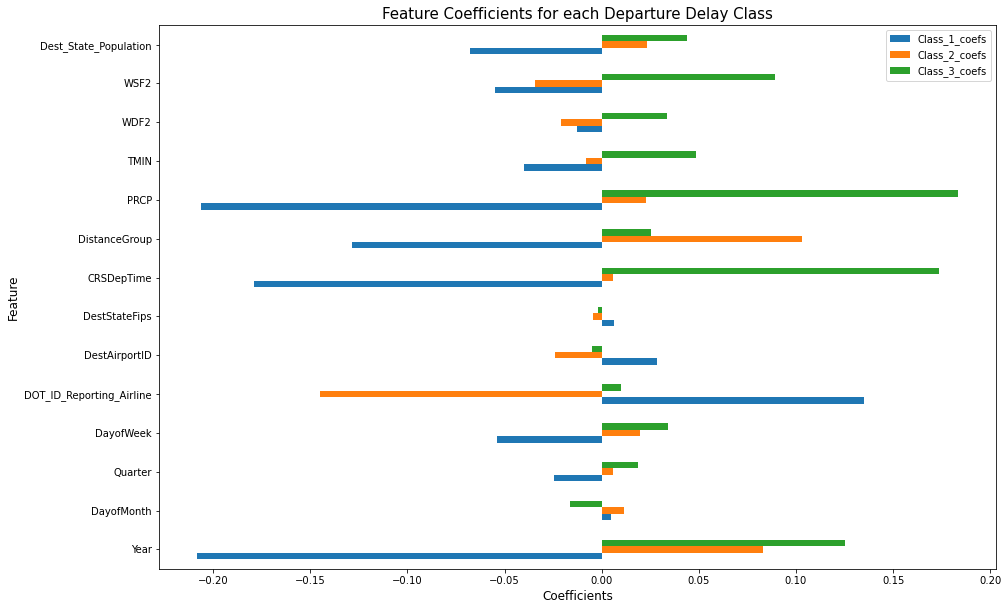

In [178]:
coef_df.plot(kind = "barh", stacked = False, figsize = (15,10))

plt.title("Feature Coefficients for each Departure Delay Class", fontsize = 15)
plt.xlabel("Coefficients", fontsize = 12)
plt.ylabel("Feature", fontsize = 12)

plt.show()

Observations:

- Precipitation (PRCP) increases the likelihood of class 2 or 3 delays, and where precipitation is lower the flights are more likely to leave on time;
- Departure time (CRSDepTime) has positive coefficients for class 2 and 3, although it is a stronger predictor of class 3, this makes sense since we expect more delays later in the day since there are likely to be knock-on effects which could cause delays later in the day;
- The year coefficient is positive for class 2 and 3 delays meaning that flights in 2021 are more likely to be delayed which was shown in the EDA section. In 2020 there was a decrease in the number of flights operating per day and we also know that less people were flying so there were less delays as a result. When travel returned to near pre-pandemic levels there were more likely to be delays since there were more travelers and a shortage of staff for all of these flights;
- Reporting Airline is positive for class 1, meaning that certain airlines are more likely to depart on-time. And it's negative for class 2 meaning that some airlines are more likely to be delayed, this was seen in the EDA notebook which showed that JetBlue Airways, Spirit Airlines, Southwest Airlines, Envoy Air and Alaska Air had a higher proportion of delayed flights as compared to other airlines.

Calculate the odds ratio for each class by indexing the coefficients and using `np.exp` to calculate the exponential function of each coefficient. Start with class 1.

In [135]:
odds_1 = np.exp(LR_down_coefs[0])

In [136]:
odds_1

array([0.81195175, 1.00480632, 0.97551227, 0.94776245, 1.14462584,
       1.02911746, 1.00621917, 0.8360131 , 0.8795017 , 0.81383407,
       0.96067005, 0.98726584, 0.94677364, 0.93464824])

Odds ratio calculation for class 2.

In [137]:
odds_2 = np.exp(LR_down_coefs[1])

In [138]:
odds_2

array([1.08665114, 1.01165213, 1.00593328, 1.01970873, 0.86491095,
       0.97644916, 0.99561433, 1.00571694, 1.10866929, 1.0230186 ,
       0.99174417, 0.97930316, 0.96604487, 1.02374756])

Odds ratio calculation for class 3.

In [139]:
odds_3 = np.exp(LR_down_coefs[2])

In [140]:
odds_3

array([1.13339068, 0.98375384, 1.01905609, 1.03472363, 1.0101016 ,
       0.99514283, 0.99819703, 1.18935404, 1.02556053, 1.20110397,
       1.04960549, 1.03430526, 1.09334329, 1.04510259])

Put the feature names and their coefficient values into a data frame.

In [184]:
odds_df = pd.DataFrame({'Feature': X_train.columns, 'Class_1_odds': odds_1, 'Class_2_odds': odds_2, 'Class_3_odds': odds_3})

odds_df = odds_df.set_index("Feature")
odds_df

,Class_1_odds,Class_2_odds,Class_3_odds
Feature,,,
Year,0.811952,1.086651,1.133391
DayofMonth,1.004806,1.011652,0.983754
Quarter,0.975512,1.005933,1.019056
DayofWeek,0.947762,1.019709,1.034724
DOT_ID_Reporting_Airline,1.144626,0.864911,1.010102
DestAirportID,1.029117,0.976449,0.995143
DestStateFips,1.006219,0.995614,0.998197
CRSDepTime,0.836013,1.005717,1.189354
DistanceGroup,0.879502,1.108669,1.025561


Plot the odds ratio for each feature by class.

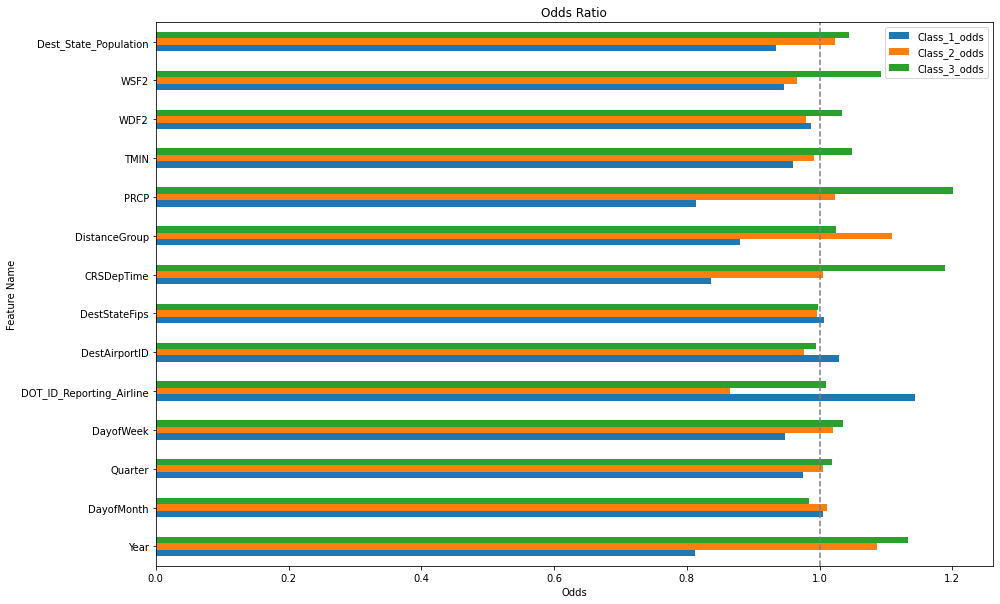

In [182]:
odds_df.plot(kind = "barh", stacked = False, figsize = (15,10))
plt.axvline(x = 1, c = "gray", linestyle="--")

plt.title("Odds Ratio")
plt.xlabel("Odds")
plt.ylabel("Feature Name")

plt.show()

Observations:

- Precipitation (PRCP) appears to be a big driver for predicting class 3 delays (30-120 minutes), it does not have a big affect on class 2 delays (0-30 minutes) and is not a significant driver of predicting class 1 (on-time flights). These results are unsurprising as I would expect inclement weather to be a bigger driver of extreme delays;
- The scheduled departure time (CRSDepTime) is also a big driver for predicting class 3 delays, this is also not surprising since flights that take off later in the day are more likely to be delayed due to knock-on effects of earlier flights;
- The reporting airline (DOT_ID_Reporting_Airline) is an important predictor for on-time flights (class 1), this was discussed in the EDA notebook where I showed that certain airlines were more often delayed than others. So flying with certain airlines would improve the likelihood of an on-time departure;

- Year is also a driver for predicting classes 2 and 3, it's more strongly linked with class 3 than class 2 but also from the EDA I showed that there were more delays in 2021 than 2020 due to the reduced number of flights in 2020 and therefore flying in 2021 would increase the odds of traveling on a delayed flight.

---

## Next Steps

I'm going to use Decision Trees in the next notebook (Notebook 6) to test if the precision and recall scores improve with another model.

---